 ## Multi-Modal LLM using Google's Gemini model for image understanding and build Retrieval Augmented Generation with LlamaIndex

### Google Gemini Models
- https://ai.google.dev/gemini-api/docs

- https://ai.google.dev/gemini-api/docs/models/gemini

- https://aistudio.google.com/prompts/new_chat?pli=1
###  LLamaindex
LlamaIndex is a framework for building context-augmented generative AI applications with LLMs including agents and workflows.

https://docs.llamaindex.ai/en/stable/

### Qdrant
Qdrant (read: quadrant) is a vector similarity search engine and vector database. It provides a production-ready service with a convenient API to store, search, and manage points—vectors with an additional payload Qdrant is tailored to extended filtering support. It makes it useful for all sorts of neural-network or semantic-based matching, faceted search, and other applications.

- https://qdrant.tech/
- https://github.com/qdrant/qdrant

In [ ]:
! pip install -q "llama-index==0.11.15" llama-index-readers-file

In [ ]:
%pip install llama-index-multi-modal-llms-gemini
%pip install llama-index-vector-stores-qdrant
%pip install llama-index-embeddings-gemini
%pip install llama-index-llms-gemini

In [ ]:
!pip install llama-index 'google-generativeai>=0.3.0' matplotlib qdrant_client  python-dotenv

In [1]:
from dotenv import dotenv_values
import os

In [4]:
# read env file
ROOT_DIR = os.getcwd()
config = dotenv_values(os.path.join(ROOT_DIR, "keys", ".env"))


In [3]:
GOOGLE_API_KEY = config.get("GEMINI-API-KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [6]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

from llama_index.core.multi_modal_llms.generic_utils import load_image_urls

image_urls = [
    "https://storage.googleapis.com/generativeai-downloads/data/scene.jpg",
    # Add yours here!
]

image_documents = load_image_urls(image_urls)

gemini_pro = GeminiMultiModal(model_name="models/gemini-1.5-flash-latest")

https://storage.googleapis.com/generativeai-downloads/data/scene.jpg


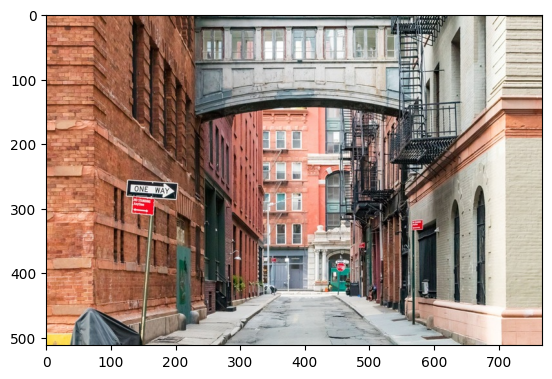

In [7]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [8]:
complete_response = gemini_pro.complete(
    prompt="Identify the city where this photo was taken. and the area",
    image_documents=image_documents,
)

In [9]:
print(complete_response)

This photo was taken in New York City, in the Tribeca neighborhood.  The bridge in the photo is the "Footbridge" which is a pedestrian bridge that connects two buildings on Franklin Street.  The bridge is a popular landmark in Tribeca.


In [10]:
stream_complete_response = gemini_pro.stream_complete(
    prompt="Give me more context for this image",
    image_documents=image_documents,
)

In [11]:
for r in stream_complete_response:
    print(r.text, end="")

The image shows a narrow street in a city, with brick buildings on either side. There is a pedestrian bridge overhead, and a "one way" sign on the left side of the street. The street is empty, and the buildings are old and worn. The image is likely taken in a city like New York or Boston, where old buildings are common. The image could be used to illustrate a story about urban life, or to evoke a sense of nostalgia for a bygone era.

In [17]:
ROOT_DIR

'/mnt/d/repos/llamaindex'

https://live.staticflickr.com/7428/9552670556_e8720cf1fc_n.jpg


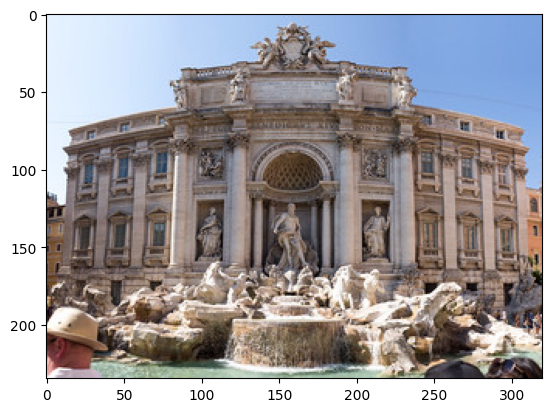

In [19]:
image_urls = [
    "https://live.staticflickr.com/7428/9552670556_e8720cf1fc_n.jpg",
    "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",

]

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg


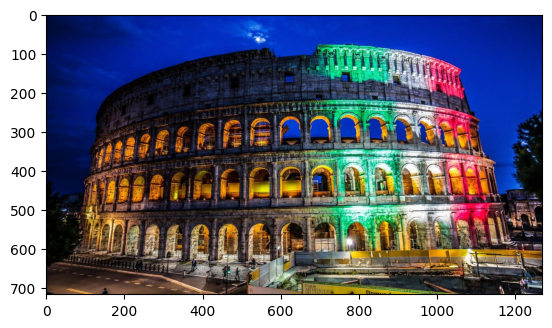

In [21]:
img_response = requests.get(image_urls[1])
print(image_urls[1])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [20]:

image_documents_1 = load_image_urls(image_urls)

response_multi = gemini_pro.complete(
    prompt="is there any relationship between those images?",
    image_documents=image_documents_1,
)
print(response_multi)

Both images are of famous landmarks in Rome, Italy. The first image is of the Trevi Fountain, and the second image is of the Colosseum.


## Gemini + Pydantic for Structured Output Parsing from an Image

In [23]:
import google.generativeai as genai

genai.configure(
    api_key=GOOGLE_API_KEY,
    client_options={"api_endpoint": "generativelanguage.googleapis.com"},
)

In [24]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924


In [25]:
from pathlib import Path

input_image_path = Path("google_restaurants")
if not input_image_path.exists():
    Path.mkdir(input_image_path)

In [48]:
# !wget "https://docs.google.com/uc?export=download&id=1Pg04p6ss0FlBgz00noHAOAJ1EYXiosKg" -O ./google_restaurants/miami.png
# !wget "https://docs.google.com/uc?export=download&id=1dYZy17bD6pSsEyACXx9fRMNx93ok-kTJ" -O ./google_restaurants/orlando.png
# !wget "https://docs.google.com/uc?export=download&id=1ShPnYVc1iL_TA1t7ErCFEAHT74-qvMrn" -O ./google_restaurants/sf.png
# !wget "https://docs.google.com/uc?export=download&id=1WjISWnatHjwL4z5VD_9o09ORWhRJuYqm" -O ./google_restaurants/toronto.png

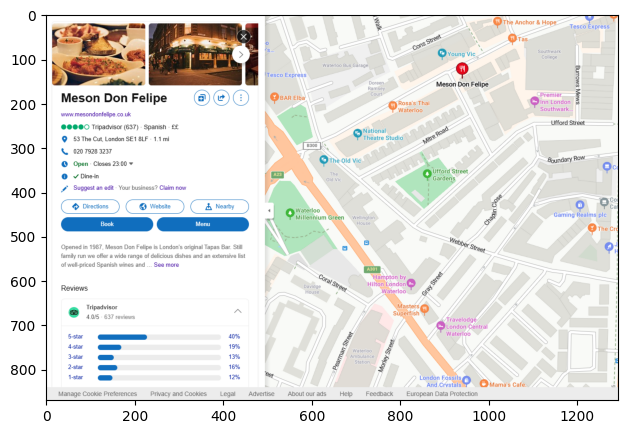

In [49]:
from pydantic import BaseModel
from PIL import Image
import matplotlib.pyplot as plt


class GoogleRestaurant(BaseModel):
    """Data model for a Google Restaurant."""

    restaurant: str
    food: str
    location: str
    category: str
    hours: str
    price: str
    rating: str
    review: str
    description: str
    nearby_tourist_places: str


google_image_url = "./google_restaurants/london.png"
image = Image.open(google_image_url).convert("RGB")

plt.figure(figsize=(16, 5))
plt.imshow(image)

In [38]:
# models/gemini-1.5-flash-latest

 # GEMINI Multimodal

#### MultiModalLLMCompletionProgram 
https://docs.llamaindex.ai/en/stable/api_reference/program/multi_modal/


In [50]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal
from llama_index.core.program import MultiModalLLMCompletionProgram
from llama_index.core.output_parsers import PydanticOutputParser

prompt_template_str = """\
    can you summarize what is in the image\
    and return the answer with json format \
    if you are unable to find some information \
    just return unavailable for that attribute
"""


def pydantic_gemini(
    model_name, output_class, image_documents, prompt_template_str
):
    gemini_llm = GeminiMultiModal(
        api_key=GOOGLE_API_KEY, model_name=model_name
    )

    llm_program = MultiModalLLMCompletionProgram.from_defaults(
        output_parser=PydanticOutputParser(output_class),
        image_documents=image_documents,
        prompt_template_str=prompt_template_str,
        multi_modal_llm=gemini_llm,
        verbose=True,
    )

    response = llm_program()
    return response

In [51]:
from llama_index.core import SimpleDirectoryReader

google_image_documents = SimpleDirectoryReader(
    "./google_restaurants"
).load_data()

results = []
for img_doc in google_image_documents:
    pydantic_response = pydantic_gemini(
        "models/gemini-1.5-flash-latest",
        GoogleRestaurant,
        [img_doc],
        prompt_template_str,
    )
    # only output the results for miami for example along with image
    if "miami" in img_doc.image_path:
        for r in pydantic_response:
            print(r)
    results.append(pydantic_response)

> Raw output: ```json
{"restaurant": "Lettera Trattoria Moderna", "food": "Italian", "location": "Calle de la Reina 20, 28004, Madrid", "category": "Restaurant", "hours": "Closed - Opens 20:30", "price": "€€", "rating": "5.0/5", "review": "1,609 reviews", "description": "Combinamos recetas tradicionales con técnicas e ingredientes actuales, tanto en el contenido como en la forma. No dejamos de...", "nearby_tourist_places": "unavailable"}
```
> Raw output: ```json
{"restaurant": "Rangoli", "food": "Indian", "location": "Passeig Joan de Borbó 78, 08039, Barcelona", "category": "Restaurant", "hours": "Closed - Opens 20:00", "price": "€€", "rating": "4.0/5", "review": "637 reviews", "description": "At Rangoli we aim to provide you with the culinary art of India, with an emphasis on the rich Indian street food. It's our pleasure to present to you recipes that have been handed down...", "nearby_tourist_places": "unavailable"}
```
> Raw output: ```json
{"restaurant": "Meson Don Felipe", "food

In [54]:
len(results)

10

In [60]:
results[0]

GoogleRestaurant(restaurant='Lettera Trattoria Moderna', food='Italian', location='Calle de la Reina 20, 28004, Madrid', category='Restaurant', hours='Closed - Opens 20:30', price='€€', rating='5.0/5', review='1,609 reviews', description='Combinamos recetas tradicionales con técnicas e ingredientes actuales, tanto en el contenido como en la forma. No dejamos de...', nearby_tourist_places='unavailable')

In [55]:
from llama_index.core.schema import TextNode

nodes = []
for res in results:
    text_node = TextNode()
    metadata = {}
    for r in res:
        # set description as text of TextNode
        if r[0] == "description":
            text_node.text = r[1]
        else:
            metadata[r[0]] = r[1]
    text_node.metadata = metadata
    nodes.append(text_node)

In [56]:
nodes

[TextNode(id_='beb29134-4399-430a-96e2-2c09ffc3648d', embedding=None, metadata={'restaurant': 'Lettera Trattoria Moderna', 'food': 'Italian', 'location': 'Calle de la Reina 20, 28004, Madrid', 'category': 'Restaurant', 'hours': 'Closed - Opens 20:30', 'price': '€€', 'rating': '5.0/5', 'review': '1,609 reviews', 'nearby_tourist_places': 'unavailable'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='Combinamos recetas tradicionales con técnicas e ingredientes actuales, tanto en el contenido como en la forma. No dejamos de...', mimetype='text/plain', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 TextNode(id_='775e29f9-0558-41ed-87bf-7ba698578efa', embedding=None, metadata={'restaurant': 'Rangoli', 'food': 'Indian', 'location': 'Passeig Joan de Borbó 78, 08039, Barcelona', 'category': 'Restaurant', 'hours': 'Closed - Opens 20:00', 'price': '€€', 'ra

In [ ]:
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.embeddings.gemini import GeminiEmbedding
from llama_index.llms.gemini import Gemini
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import Settings
from llama_index.core import StorageContext
import qdrant_client


# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_gemini")

vector_store = QdrantVectorStore(client=client, collection_name="collection")

# Using the embedding model to Gemini
Settings.embed_model = GeminiEmbedding(
    model_name="models/embedding-001", api_key=GOOGLE_API_KEY
)
Settings.llm = Gemini(api_key=GOOGLE_API_KEY)

storage_context = StorageContext.from_defaults(vector_store=vector_store)

index = VectorStoreIndex(
    nodes=nodes,
    storage_context=storage_context,
)

In [58]:
query_engine = index.as_query_engine(
    similarity_top_k=2,
)

response = query_engine.query(
    "recommend me a restaurant in New York explain me what I can find it and which kind of food has"
)
print(response)

I recommend a restaurant in New York that serves Spanish tapas, paella, sangria, and craft cocktails. It has a vibrant atmosphere and is open for dinner, brunch, and happy hour. 

